In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

In [400]:
june=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\june 2016.csv",index_col=[0],parse_dates=[0], header=None)
july=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\july 2016.csv",index_col=[0],parse_dates=[0], header=None)
august=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\august 2016.csv",index_col=[0],parse_dates=[0], header=None)
september=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\september 2016.csv",index_col=[0],parse_dates=[0], header=None)
october=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\october 2016.csv",index_col=[0],parse_dates=[0], header=None)
november=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\november 2016.csv",index_col=[0],parse_dates=[0], header=None)
december=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\december 2016.csv",index_col=[0],parse_dates=[0], header=None)

In [401]:
data=pd.concat([june, july, august, september, october, november, december])

In [402]:
data.columns=['company']
data['count']=1
#data['lyft']=data['company']=='Lyft'
#data['uber']=data['company']=='Uber'


In [11]:
lyfted=data.query('lyft == True ')
ubered=data.query('uber == True')

In [14]:
lyfted.head()

,company,count,lyft,uber
0,,,,
2016-06-17 14:19:40,Lyft,1,True,False
2016-06-17 14:33:07,Lyft,1,True,False
2016-06-17 14:36:16,Lyft,1,True,False
2016-06-17 14:40:03,Lyft,1,True,False
2016-06-17 15:41:31,Lyft,1,True,False


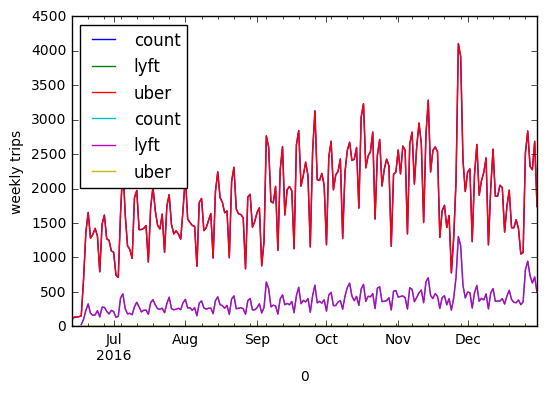

In [55]:
d3=lyfted.resample('d').sum()
d2=ubered.resample('d').sum()
ax = d2.plot()
d3.plot(ax=ax)
plt.ylabel('weekly trips');

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3600).mean()
  if __name__ == '__main__':


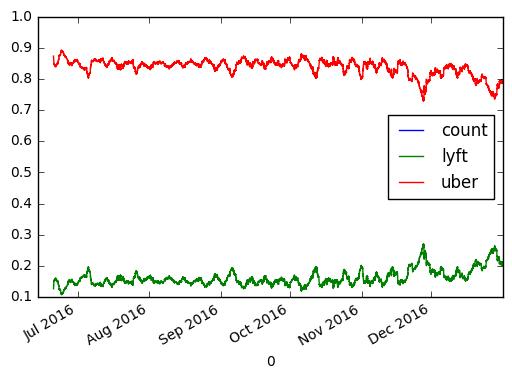

In [72]:
pd.stats.moments.rolling_mean(data, 60*60
                             ).plot();

In [41]:
pivoted = d2.pivot_table(['count'],
                           index=d2.index.date,
                           columns=d2.index.hour,
                           fill_value=0)
pivoted.head()

count                             ...                             \
              0  1  2  3  4  5  6  7  8   9  ...  14  15  16 17  18  19  20   
2016-06-13     0  0  0  0  0  0  0  0  0   0 ...  12  16  10  5  15   6   5   
2016-06-14     6  4  1  2  1  0  2  6  6   8 ...   6   8   9  3  14   8   7   
2016-06-15     3  2  1  0  0  0  1  9  6  10 ...   8  14   9  5   3  13  10   
2016-06-16     4  1  2  0  1  0  2  2  1   8 ...  13   6   8  3  11  13   5   
2016-06-17     0  3  2  1  0  4  1  4  4  12 ...   7  10   8  8  10  12   9   

                        
            21  22  23  
2016-06-13  20   7   5  
2016-06-14   7   6   3  
2016-06-15   7   3   5  
2016-06-16  15   5  14  
2016-06-17  10  14   8  

[5 rows x 24 columns]

In [42]:
X = pivoted.values
X.shape

(202, 24)

In [43]:
from sklearn.decomposition import PCA
Xpca = PCA(0.9).fit_transform(X)
Xpca.shape

(202, 6)

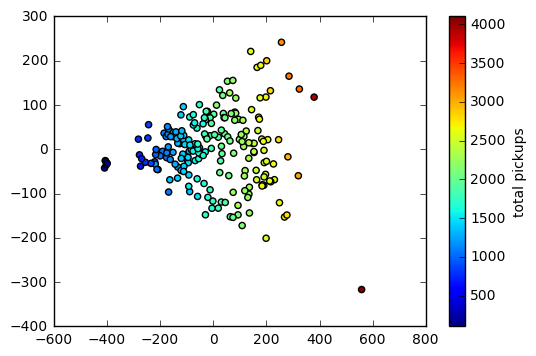

In [44]:
total_trips = X.sum(1)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=total_trips)
plt.colorbar(label='total pickups');

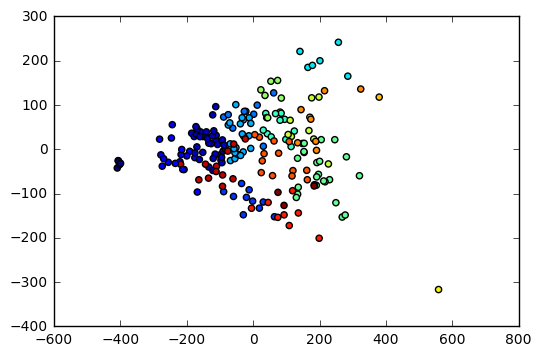

In [45]:
from sklearn.cluster import AffinityPropagation
gmm = AffinityPropagation()
gmm.fit(Xpca)
cluster_label = gmm.fit_predict(Xpca)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=cluster_label);

In [46]:
cluster_label

array([ 0,  0,  0,  0,  0,  2,  3,  4,  1,  1,  1,  1,  2,  3,  4,  1,  1,
        2,  2,  2,  2,  3,  7,  5,  1,  1,  2,  3,  4,  1,  1,  1,  1,  2,
        3,  4,  4,  1,  1,  1,  2,  3,  4,  1,  1,  1,  1, 16,  3,  4, 16,
        1,  1,  1,  2,  3,  4,  1,  1,  5,  5,  2,  3,  9,  5,  5,  5,  5,
        2, 15,  4,  5,  5,  5,  5,  2, 15,  5,  1,  5,  5,  5,  2,  1,  8,
        6,  5,  5,  7,  1,  8,  6,  5,  7,  7,  7,  1,  8,  6,  9,  7,  7,
        7,  1,  8,  6,  9,  7,  7,  7,  1,  8,  6,  9,  9,  7,  8,  1,  8,
       10, 10, 10,  8,  8,  5,  8,  6, 10, 10,  8,  8,  5,  8, 10,  9, 10,
        8,  8,  1,  8,  9, 10, 10,  8, 10,  1,  8, 13, 14,  8,  8, 13,  1,
        8, 13, 14, 13,  8, 14, 16, 15,  5, 16, 16,  2,  1, 15, 11, 12, 13,
       14, 15, 14,  1, 15, 13, 14, 14, 14, 14,  1, 15, 13, 14, 14, 14, 14,
       16,  3, 16, 16, 16, 16, 16,  2,  2, 15, 17, 17, 17, 17, 16], dtype=int64)

In [47]:
pivoted['Cluster'] = cluster_label
d2 = d2.join(pivoted['Cluster'], on=d2.index.date)
d2.head()
by_hour = d2.groupby(['Cluster', d2.index.time]).mean()


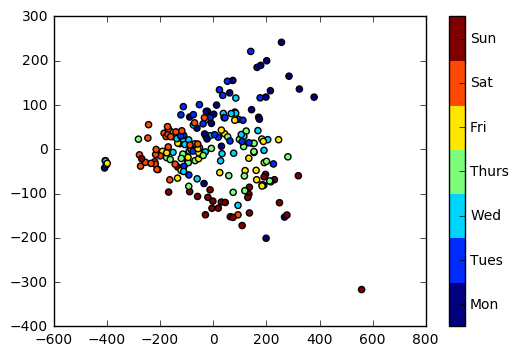

In [48]:
dayofweek = pd.to_datetime(pivoted.index).dayofweek
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.clim(-0.5, 6.5);

In [ ]:
feb=pd.read_csv("C:\\Users\\jpisel\\Downloads\\AVI Feb 2015.csv", parse_dates=True, index_col=['Trip Start Time'])
march=pd.read_csv("C:\\Users\\jpisel\\Downloads\\AVI_March_2015.csv", parse_dates=True, index_col=['TripStartTime'])
april=pd.read_csv("C:\\Users\\jpisel\\Downloads\\AVI_April_2015.csv", parse_dates=True, index_col=['TripStartTime'])
may=pd.read_csv("C:\\Users\\jpisel\\Downloads\\AVI_May_2015.csv", parse_dates=True, index_col=['TripStartTime'])
june=pd.read_csv("C:\\Users\\jpisel\\Downloads\\AVI_June_2015.csv", parse_dates=True, index_col=['TripStartTime'])
july=pd.read_csv("C:\\Users\\jpisel\\Downloads\\AVI_July_2015.csv", parse_dates=True, index_col=['TripStartTime'])
aug=pd.read_csv("C:\\Users\\jpisel\\Downloads\\AVI_August_2015.csv", parse_dates=True, index_col=['TripStartTime'])
sept=pd.read_csv("C:\\Users\\jpisel\\Downloads\\AVI_September_2015.csv", parse_dates=True, index_col=['TripStartTime'])
airport_own=pd.concat([feb, march, april, may, june, july, aug, sept])
airport_own.head()

In [ ]:
airport_own['count']=1

In [ ]:
a2=airport_own.resample('h').sum()
a2.plot()
plt.ylabel('weekly trips');

In [381]:
the_types=airport_own.OperatorType.unique()
print(the_types)
for i in range(len(the_types)):
    airport_own[the_types[i]]=airport_own['OperatorType']==the_types[i]

['Shared Ride Van' 'Pre-arranged' 'Off Airport Parking' 'Hotel/Motel'
 'Rental Car Buses' 'Inter City' 'Taxi' 'Courtesy' 'Unissued' 'Charter Bus'
 'Off-Airport Rental Car' 'City of Phoenix']


In [382]:
cols = airport_own.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
airport_own.columns = cols
cols = airport_own.columns
cols = cols.map(lambda x: x.replace('-', '_') if isinstance(x, (str)) else x)
airport_own.columns = cols
cols = airport_own.columns
cols = cols.map(lambda x: x.replace('/', '_') if isinstance(x, (str)) else x)

airport_own.columns = cols
airport_own.head()

,TripEndTime,OperatorType,Duration,count,Shared_Ride_Van,Pre_arranged,Off_Airport_Parking,Hotel_Motel,Rental_Car_Buses,Inter_City,Taxi,Courtesy,Unissued,Charter_Bus,Off_Airport_Rental_Car,City_of_Phoenix
TripStartTime,,,,,,,,,,,,,,,,
2015-04-01 00:00:00,4/1/15 12:03 AM,Shared Ride Van,02:53.0,1,True,False,False,False,False,False,False,False,False,False,False,False
2015-04-01 00:00:00,4/1/15 12:23 AM,Pre-arranged,23:34.0,1,False,True,False,False,False,False,False,False,False,False,False,False
2015-04-01 00:00:00,4/1/15 12:14 AM,Off Airport Parking,14:14.0,1,False,False,True,False,False,False,False,False,False,False,False,False
2015-04-01 00:00:00,4/1/15 12:09 AM,Hotel/Motel,08:38.0,1,False,False,False,True,False,False,False,False,False,False,False,False
2015-04-01 00:01:00,4/1/15 12:13 AM,Off Airport Parking,12:54.0,1,False,False,True,False,False,False,False,False,False,False,False,False


In [383]:
OffAirportParking=airport_own.query('Off_Airport_Parking == True ')
SharedRideVan=airport_own.query('Shared_Ride_Van == True ')
RentalCarBuses=airport_own.query('Rental_Car_Buses == True ')
Hotel=airport_own.query('Hotel_Motel == True ')
InterCity=airport_own.query('Inter_City == True ')
Prearranged=airport_own.query('Pre_arranged == True ')
Taxi=airport_own.query('Taxi == True ')
Unissued=airport_own.query('Unissued == True ')
CharBus=airport_own.query('Charter_Bus == True ')
Courtesy=airport_own.query('Courtesy == True ')
OffRentalCar=airport_own.query('Off_Airport_Rental_Car == True ')
City=airport_own.query('City_of_Phoenix == True ')


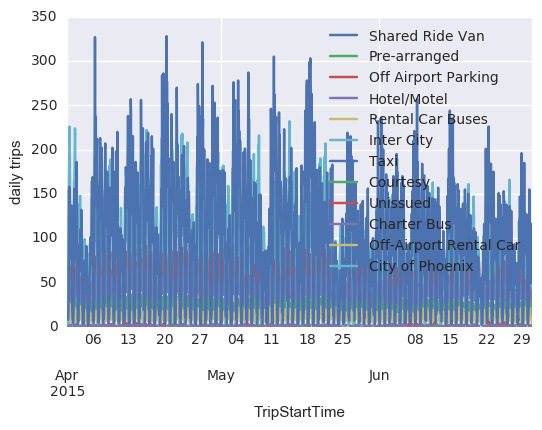

In [384]:
oap=OffAirportParking.resample('h').sum()
srv=SharedRideVan.resample('h').sum()
rcb=RentalCarBuses.resample('h').sum()
ho=Hotel.resample('h').sum()
ic=InterCity.resample('h').sum()
pre=Prearranged.resample('h').sum()
taxi=Taxi.resample('h').sum()
uniss=Unissued.resample('h').sum()
cb=CharBus.resample('h').sum()
cour=Courtesy.resample('h').sum()
orc=OffRentalCar.resample('h').sum()
cty=City.resample('h').sum()

all_types=[[oap, srv, rcb, ho, ic, pre, taxi, uniss, cb, cour, orc, cty]]

ax=oap['count'].plot()
srv['count'].plot(ax=ax)
rcb['count'].plot(ax=ax)
ho['count'].plot(ax=ax)
ic['count'].plot(ax=ax)
pre['count'].plot(ax=ax)
taxi['count'].plot(ax=ax)
uniss['count'].plot(ax=ax)
cb['count'].plot(ax=ax)
cour['count'].plot(ax=ax)
orc['count'].plot(ax=ax)
cty['count'].plot(ax=ax)
plt.ylabel('daily trips');
plt.legend(list(the_types))

In [385]:
oap=oap.drop(oap.columns[[np.arange(1,13)]], axis=1)
srv=srv.drop(srv.columns[[np.arange(1,13)]], axis=1)
rcb=rcb.drop(rcb.columns[[np.arange(1,13)]], axis=1)
ho=ho.drop(ho.columns[[np.arange(1,13)]], axis=1)
ic=ic.drop(ic.columns[[np.arange(1,13)]], axis=1)
pre=pre.drop(pre.columns[[np.arange(1,13)]], axis=1)
taxi=taxi.drop(taxi.columns[[np.arange(1,13)]], axis=1)
uniss=uniss.drop(uniss.columns[[np.arange(1,13)]], axis=1)
cb=cb.drop(cb.columns[[np.arange(1,13)]], axis=1)
cour=cour.drop(cour.columns[[np.arange(1,13)]], axis=1)
orc=orc.drop(orc.columns[[np.arange(1,13)]], axis=1)
cty=cty.drop(cty.columns[[np.arange(1,13)]], axis=1)

In [386]:
tours=[rcb, ho, taxi, uniss, cb, cour, orc, ]
local=[oap, srv, ic, pre, cty]

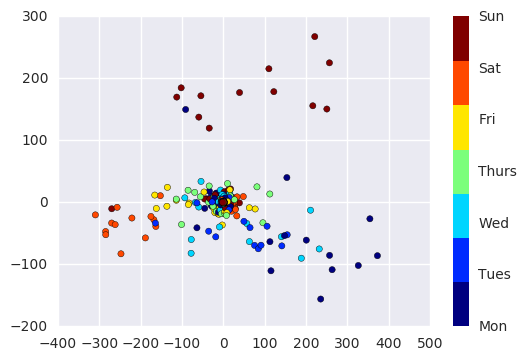

In [388]:
from sklearn.decomposition import PCA
for item in tours:
    pivoted= item.pivot_table(['count'],
                           index=item.index.date,
                           columns=item.index.hour,
                           fill_value=0)
    X = pivoted.values
    X.shape
    Xpca = PCA(0.9).fit_transform(X)
    Xpca.shape
    total_trips = X.sum(1)
    dayofweek = pd.to_datetime(pivoted.index).dayofweek
    plt.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


In [389]:
pivoted= a2.pivot_table(['count'],
                           index=a2.index.date,
                           columns=a2.index.hour,
                           fill_value=0)
X = pivoted.values
X.shape

(91, 24)

In [390]:
from sklearn.decomposition import PCA
Xpca = PCA(0.9).fit_transform(X)
Xpca.shape

(91, 4)

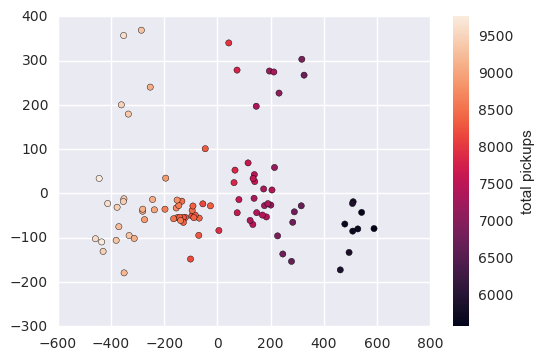

In [391]:
total_trips = X.sum(1)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=total_trips)
plt.colorbar(label='total pickups');

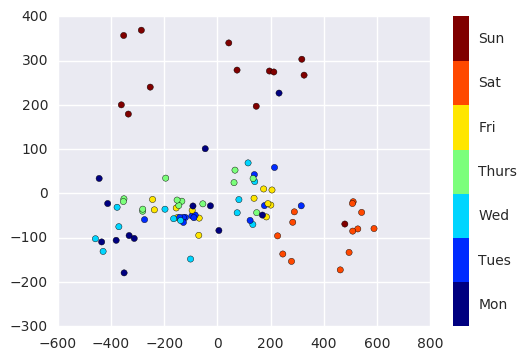

In [392]:
dayofweek = pd.to_datetime(pivoted.index).dayofweek
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.clim(-0.5, 6.5);

In [377]:
airport_own

,TripEndTime,OperatorType,Duration,count,Off_Airport_Parking,Shared_Ride_Van,Rental_Car_Buses,Hotel_Motel,Inter_City,Pre_arranged,Taxi,Unissued,Charter_Bus,Courtesy,Off_Airport_Rental_Car,City_of_Phoenix
TripStartTime,,,,,,,,,,,,,,,,
2015-06-01 00:00:00,6/1/15 12:15 AM,Off Airport Parking,14:58.0,1,True,False,False,False,False,False,False,False,False,False,False,False
2015-06-01 00:00:00,6/1/15 12:19 AM,Shared Ride Van,18:48.0,1,False,True,False,False,False,False,False,False,False,False,False,False
2015-06-01 00:00:00,6/1/15 2:52 PM,Rental Car Buses,51:49.0,1,False,False,True,False,False,False,False,False,False,False,False,False
2015-06-01 00:00:00,6/1/15 2:37 PM,Rental Car Buses,37:01.0,1,False,False,True,False,False,False,False,False,False,False,False,False
2015-06-01 00:00:00,6/1/15 4:48 PM,Rental Car Buses,48:08.0,1,False,False,True,False,False,False,False,False,False,False,False,False
2015-06-01 00:00:00,6/1/15 4:23 AM,Rental Car Buses,22:23.0,1,False,False,True,False,False,False,False,False,False,False,False,False
2015-06-01 00:00:00,6/1/15 12:13 AM,Off Airport Parking,12:22.0,1,True,False,False,False,False,False,False,False,False,False,False,False
2015-06-01 00:00:00,6/1/15 12:13 AM,Shared Ride Van,13:00.0,1,False,True,False,False,False,False,False,False,False,False,False,False
2015-06-01 00:01:00,6/1/15 4:50 PM,Rental Car Buses,49:06.0,1,False,False,True,False,False,False,False,False,False,False,False,False


In [403]:
full=pd.concat([data,airport_own])

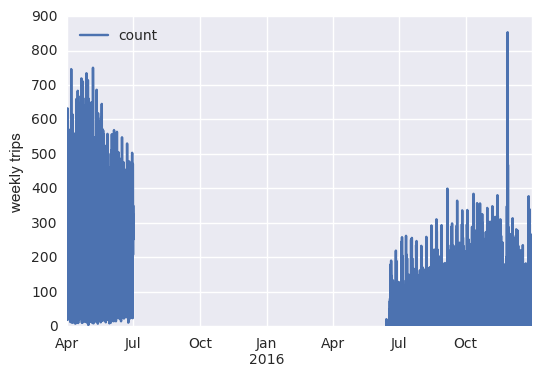

In [404]:
full2=full.resample('h').sum()
full2.plot()
plt.ylabel('weekly trips');

In [405]:
pivoted= full2.pivot_table(['count'],
                           index=full2.index.date,
                           columns=full2.index.hour,
                           fill_value=0)
X = pivoted.values
X.shape

(641, 24)

In [413]:
from sklearn.decomposition import PCA
Xpca = PCA(2).fit_transform(X)
Xpca.shape

(641, 2)

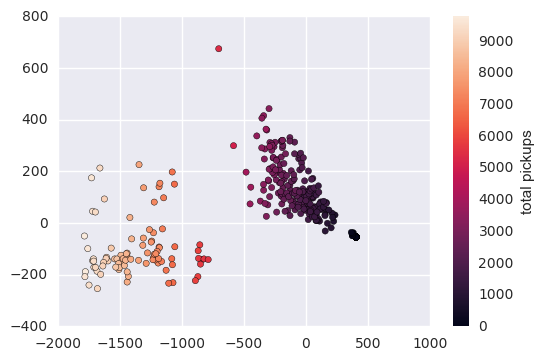

In [415]:
total_trips = X.sum(1)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=total_trips)
plt.colorbar(label='total pickups');

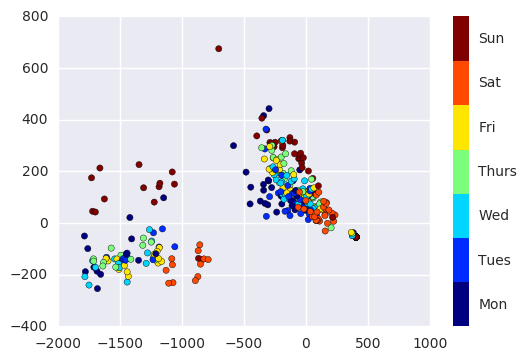

In [416]:
dayofweek = pd.to_datetime(pivoted.index).dayofweek
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.clim(-0.5, 6.5);

In [410]:
Xpca

array([[ -1.44188428e+03],
       [ -1.49212242e+03],
       [ -1.19205366e+03],
       [ -8.37825157e+02],
       [ -1.06073533e+03],
       [ -1.71034707e+03],
       [ -1.44360111e+03],
       [ -1.54258174e+03],
       [ -1.57071117e+03],
       [ -1.52421402e+03],
       [ -1.07696036e+03],
       [ -1.62570083e+03],
       [ -1.68518837e+03],
       [ -1.47123716e+03],
       [ -1.72065610e+03],
       [ -1.71371474e+03],
       [ -1.59655839e+03],
       [ -1.07257874e+03],
       [ -1.72946474e+03],
       [ -1.77909707e+03],
       [ -1.60846623e+03],
       [ -1.69788787e+03],
       [ -1.71212832e+03],
       [ -1.61225066e+03],
       [ -1.12804677e+03],
       [ -1.72075548e+03],
       [ -1.68167206e+03],
       [ -1.47042822e+03],
       [ -1.78261176e+03],
       [ -1.63209174e+03],
       [ -1.50873385e+03],
       [ -1.10677248e+03],
       [ -1.69840563e+03],
       [ -1.65569254e+03],
       [ -1.48435958e+03],
       [ -1.74961388e+03],
       [ -1.51185821e+03],
 